Name : Bramha Nimbalkar 

Roll no : 7

SRN : 202100381

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('auto.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [46]:
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [47]:
corr = df.corr()
corr1 = corr['mpg']

In [48]:
corr1

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model_year      0.580541
origin          0.565209
mpg             1.000000
Name: mpg, dtype: float64

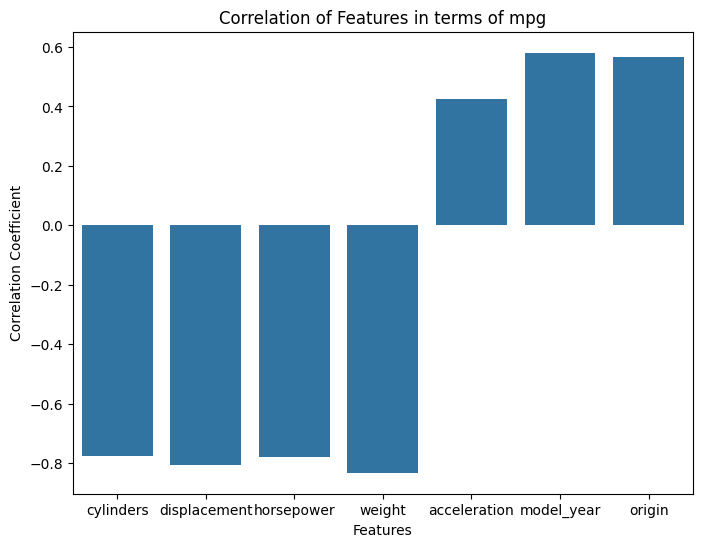

In [49]:
correlation = df.drop('mpg', axis=1).corrwith(df['mpg'])

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features in terms of mpg')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

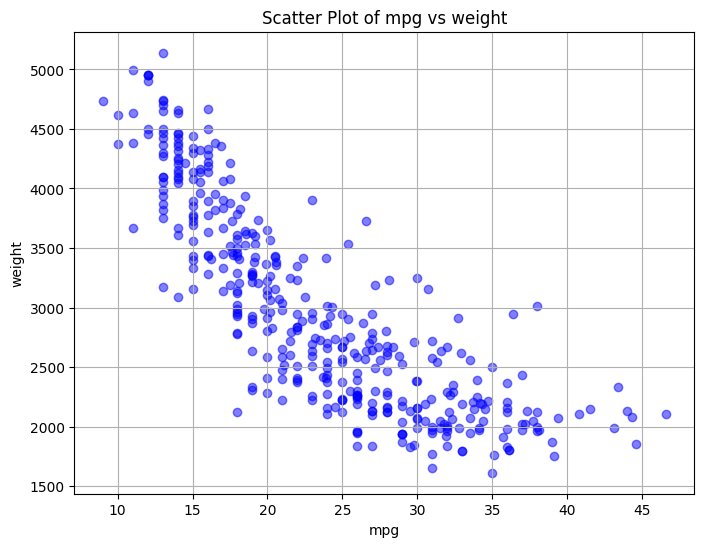

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['mpg'], df['weight'], color='blue', alpha=0.5)
plt.title(f'Scatter Plot of mpg vs weight')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.grid(True)
plt.show()

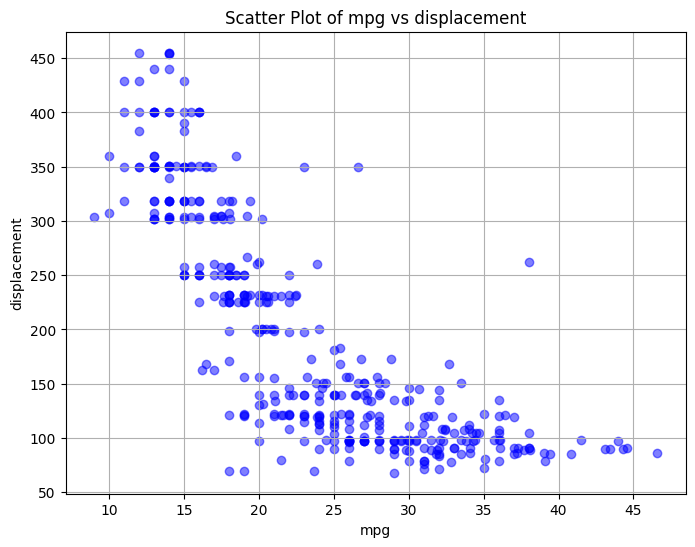

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(df['mpg'], df['displacement'], color='blue', alpha=0.5)
plt.title(f'Scatter Plot of mpg vs displacement')
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.grid(True)
plt.show()

In [52]:
X = df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']] 
y = df['mpg']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.2727457003009515


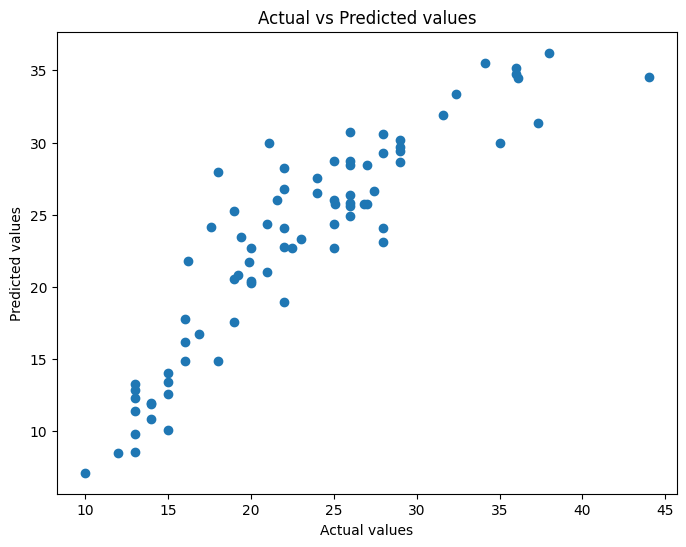

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

In [58]:
print("Coefficients:", model.coef_)
m=model.coef_
# Print intercept
print("Intercept:", model.intercept_)
c=model.intercept_

Coefficients: [-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707]
Intercept: -18.49936112872476


In [59]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     206.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          8.43e-112
Time:                        21:07:14   Log-Likelihood:                -819.10
No. Observations:                 313   AIC:                             1654.
Df Residuals:                     305   BIC:                             1684.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.4994      5.392     -3.431   

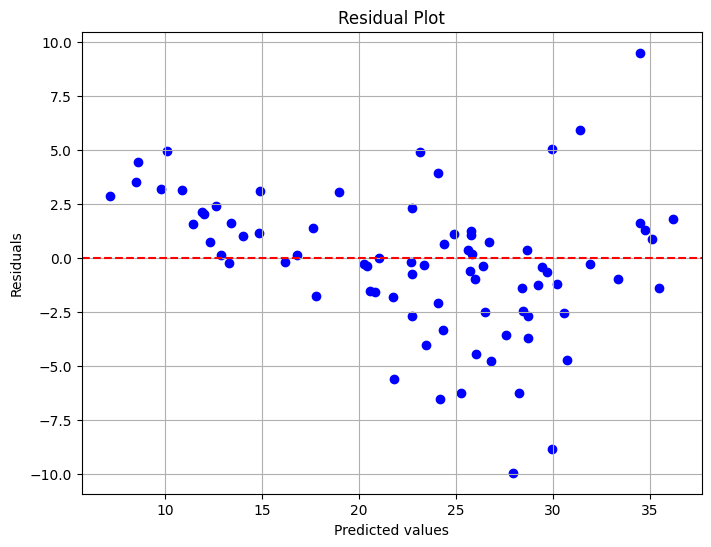

In [64]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

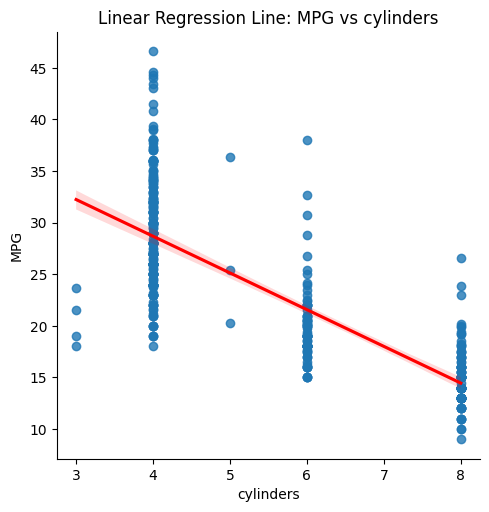

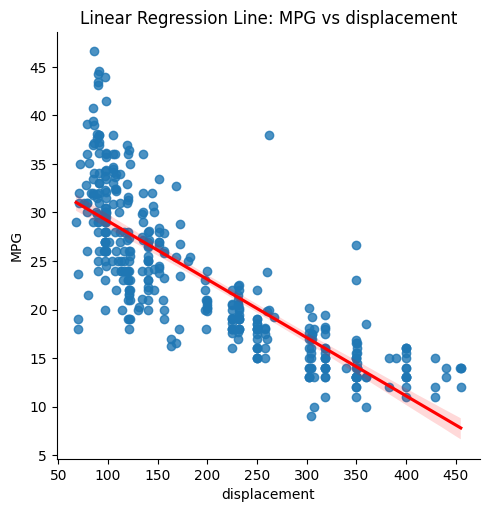

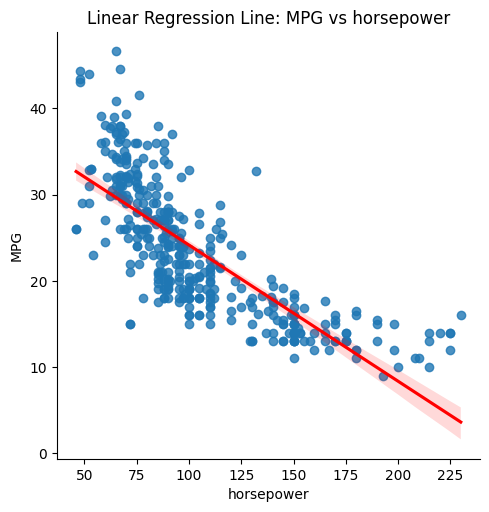

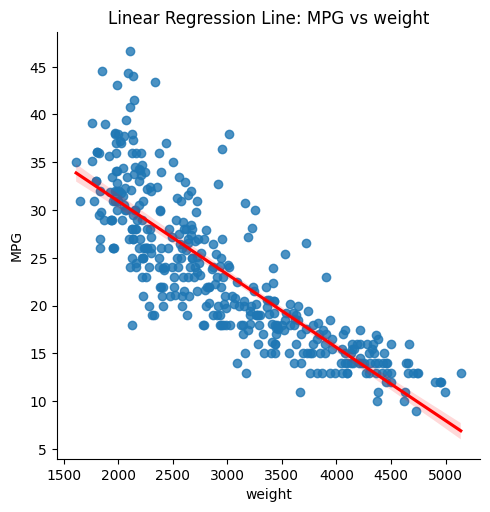

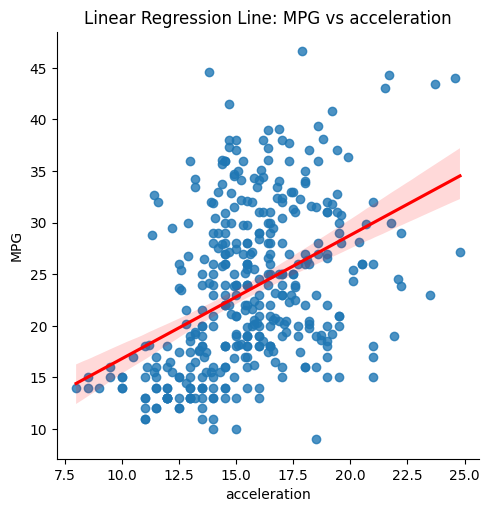

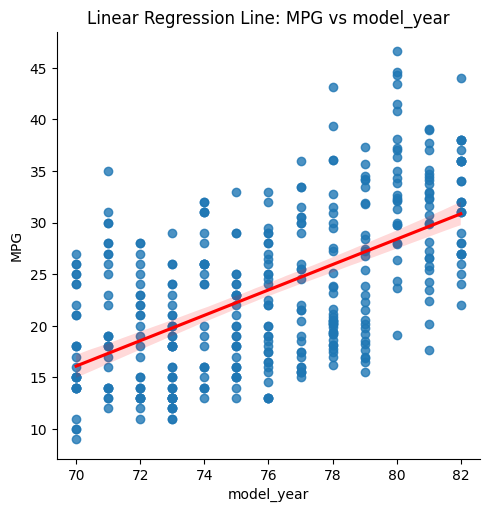

In [65]:
df_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for column in df_columns:
    sns.lmplot(x=column, y='mpg', data=df, line_kws={'color': 'red'})
    plt.title(f'Linear Regression Line: MPG vs {column}')
    plt.xlabel(column)
    plt.ylabel('MPG')
    plt.show()